In [1]:
%load_ext sql
%sql sqlite:///base.db
%config SqlMagic.style = '_DEPRECATED_DEFAULT'

In [2]:
%%sql
PRAGMA foreign_keys=on;

DROP TABLE if exists Products;
DROP TABLE if exists Items;
DROP TABLE if exists Invoices;
DROP TABLE if exists Customers;

CREATE TABLE Invoices (
          invoice_ID integer NOT NULL Primary key,
          prod_id integer NOT NULL,
          invoice_date datetime NOT NULL,
          FOREIGN KEY (prod_id) REFERENCES Products(product_id)
          );

CREATE TABLE Products (
          product_id integer NOT NULL Primary key,
          product_name varchar(20) NOT NULL,
          price integer DEFAULT 0
          );

 * sqlite:///base.db
Done.
Done.
Done.
Done.
Done.
Done.
Done.


[]

In [3]:
%%sql
PRAGMA table_info(Products);

 * sqlite:///base.db
Done.


cid,name,type,notnull,dflt_value,pk
0,product_id,INTEGER,1,None,1
1,product_name,varchar(20),1,None,0
2,price,INTEGER,0,0,0


Документация по Schema:
https://www.sqlite.org/schematab.html

In [4]:
%%sql
select * from sqlite_master;

 * sqlite:///base.db
Done.


type,name,tbl_name,rootpage,sql
table,Invoices,Invoices,2,"CREATE TABLE Invoices ( invoice_ID integer NOT NULL Primary key, prod_id integer NOT NULL, invoice_date datetime NOT NULL, FOREIGN KEY (prod_id) REFERENCES Products(product_id) )"
table,Products,Products,3,"CREATE TABLE Products ( product_id integer NOT NULL Primary key, product_name varchar(20) NOT NULL, price integer DEFAULT 0 )"


ALTER TABLE

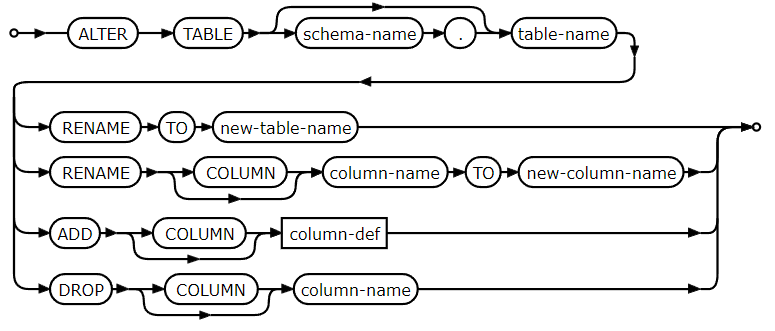

In [5]:
%%sql

--AUTOINCREMENT

INSERT INTO Products VALUES (NULL, 'Ноутбук', 35000);
INSERT INTO Products VALUES (NULL, 'Микрофон', 2000);
INSERT INTO Products VALUES (NULL, 'Смартфон', 42000);
INSERT INTO Products (product_name, price) VALUES ('Смартфон', 22000);
INSERT INTO Products (product_name, price) VALUES ('Монитор', 12000);

 * sqlite:///base.db
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.


[]

In [6]:
%%sql
SELECT * FROM Products;

 * sqlite:///base.db
Done.


product_id,product_name,price
1,Ноутбук,35000
2,Микрофон,2000
3,Смартфон,42000
4,Смартфон,22000
5,Монитор,12000


In [7]:
%%sql
INSERT INTO Products VALUES (7, 'Смартфон', 22000);
INSERT INTO Products VALUES (NULL, 'Телевизор', 12000);

 * sqlite:///base.db
1 rows affected.
1 rows affected.


[]

In [8]:
%%sql
ALTER TABLE Products ADD COLUMN description varchar(20);

 * sqlite:///base.db
Done.


[]

In [9]:
%%sql
PRAGMA table_info(Products);

 * sqlite:///base.db
Done.


cid,name,type,notnull,dflt_value,pk
0,product_id,INTEGER,1,None,1
1,product_name,varchar(20),1,None,0
2,price,INTEGER,0,0,0
3,description,varchar(20),0,None,0


RENAME TABLE

In [10]:
%%sql
ALTER TABLE Products RENAME TO Items;

 * sqlite:///base.db
Done.


[]

In [11]:
%%sql
select * from sqlite_master;

 * sqlite:///base.db
Done.


type,name,tbl_name,rootpage,sql
table,Invoices,Invoices,2,"CREATE TABLE Invoices ( invoice_ID integer NOT NULL Primary key, prod_id integer NOT NULL, invoice_date datetime NOT NULL, FOREIGN KEY (prod_id) REFERENCES ""Items""(product_id) )"
table,Items,Items,3,"CREATE TABLE ""Items"" ( product_id integer NOT NULL Primary key, product_name varchar(20) NOT NULL, price integer DEFAULT 0 , description varchar(20))"


In [12]:
%%sql
SELECT * FROM Items;

 * sqlite:///base.db
Done.


product_id,product_name,price,description
1,Ноутбук,35000,None
2,Микрофон,2000,None
3,Смартфон,42000,None
4,Смартфон,22000,None
5,Монитор,12000,None
7,Смартфон,22000,None
8,Телевизор,12000,None


UPDATE & DELETE

In [13]:
%%sql
UPDATE Items SET description = "ACER" WHERE product_name = 'Ноутбук';

 * sqlite:///base.db
1 rows affected.


[]

In [14]:
%%sql
UPDATE Items SET price = price*2 WHERE product_name = 'Смартфон';

 * sqlite:///base.db
3 rows affected.


[]

In [15]:
%%sql
SELECT * FROM Items;

 * sqlite:///base.db
Done.


product_id,product_name,price,description
1,Ноутбук,35000,ACER
2,Микрофон,2000,None
3,Смартфон,84000,None
4,Смартфон,44000,None
5,Монитор,12000,None
7,Смартфон,44000,None
8,Телевизор,12000,None


In [16]:
%%sql
DELETE FROM Items WHERE product_id = 5;

 * sqlite:///base.db
1 rows affected.


[]

**Переименовать столбец в таблице**

<s>Нельзя использовать оператор ALTER TABLE для переименования столбца в SQLite. Вместо этого нужно переименовать таблицу, создать новую таблицу и скопировать данные в новую таблицу.</s>

Теперь можно :)

In [17]:
%%sql

ALTER TABLE Items RENAME COLUMN product_id TO id;

 * sqlite:///base.db
Done.


[]

In [18]:
%%sql

-- Альтернатива (всё равно полезно знать)
-- Пример - сменить порядок столбцов

PRAGMA foreign_keys=off; -- Первый этап - отключение внешних ключей

CREATE TABLE _Items_new (
    id integer NOT NULL Primary key,
    description varchar(20),
    price integer DEFAULT 0,
    name varchar(20) NOT NULL
    );

INSERT INTO _Items_new
  SELECT id, description, price, product_name
  FROM Items;

DROP TABLE if exists Items;

ALTER TABLE _Items_new RENAME TO Items;

PRAGMA foreign_keys=on;

 * sqlite:///base.db
Done.
Done.
6 rows affected.
Done.
Done.
Done.


[]

In [19]:
%%sql
SELECT * FROM Items;

 * sqlite:///base.db
Done.


id,description,price,name
1,ACER,35000,Ноутбук
2,None,2000,Микрофон
3,None,84000,Смартфон
4,None,44000,Смартфон
7,None,44000,Смартфон
8,None,12000,Телевизор


In [20]:
%%sql
PRAGMA table_info(Items);

 * sqlite:///base.db
Done.


cid,name,type,notnull,dflt_value,pk
0,id,INTEGER,1,None,1
1,description,varchar(20),0,None,0
2,price,INTEGER,0,0,0
3,name,varchar(20),1,None,0


In [21]:
%%sql
ALTER TABLE Items DROP COLUMN description;

 * sqlite:///base.db
Done.


[]

In [22]:
%%sql
SELECT * FROM Items;

 * sqlite:///base.db
Done.


id,price,name
1,35000,Ноутбук
2,2000,Микрофон
3,84000,Смартфон
4,44000,Смартфон
7,44000,Смартфон
8,12000,Телевизор


In [23]:
%%sql
ALTER TABLE Items DROP COLUMN id;

-- поменять первичный ключ (как и любые свойства таблицы - в SQlite напрямую нельзя)

 * sqlite:///base.db
(sqlite3.OperationalError) cannot drop PRIMARY KEY column: "id"
[SQL: ALTER TABLE Items DROP COLUMN id;]
(Background on this error at: https://sqlalche.me/e/20/e3q8)
